In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Add
from keras.layers import Input
from keras.models import Model
from sklearn import datasets
from keras import regularizers
from sklearn.model_selection import train_test_split
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

#### TASK 1

Read iris dataset

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

One hot enode response variable y

In [0]:
dummy_y = np_utils.to_categorical(y)

Train test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42)

Sequential multilayer perceptron with two hidden layers and rectified linear nonlinearities

In [0]:
def baseline_model(hidden, strength):
  model = Sequential()
  model.add(Dense(hidden, input_dim=4, activation='relu', kernel_regularizer=regularizers.l2(strength)))
  model.add(Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(strength)))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20)

Select regularization strength and number of hidden units using GridSearchCV

In [7]:
param_grid = {  
    'strength': [0.001, 0.01, 1, 10],
    'hidden': [8, 16, 32, 64]
}
grid = GridSearchCV(estimator, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
80/80 [==============================] - 3s 33ms/step - loss: 1.2310 - acc: 0.2750
Epoch 2/20
80/80 [==============================] - 0s 166us/step - loss: 1.2079 - acc: 0.2750
Epoch 3/20
80/80 [==============================] - 0s 173us/step - loss: 1.1888 - acc: 0.2750
Epoch 4/20
80/80 [==============================] - 0s 163us/step - loss: 1.1681 - acc: 0.2750
Epoch 5/20
80/80 [==============================] - 0s 166us/step - loss: 1.1502 - acc: 0.2750
Epoch 6/20
80/80 [==============================] - 0s 156us/step - loss: 1.1332 - acc: 0.2750
Epoch 7/20
80/80 [==============================] - 0s 158us/step - loss: 1.1201 - acc: 0.2750
Epoch 8/20
80/80 [==============================] - 0s 162us/step - loss: 1.1071 - acc: 0.2750
Epoch 9/20
80/80 [==============================] - 0s 162us/step - loss: 1.0961 - acc: 0.2750
Epoch 10/20
80/80 [=======

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd80d9c7080>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'strength': [0.001, 0.01, 1, 10], 'hidden': [8, 16, 32, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
print("Results of Grid Search")
print("Best accuracy score")
print(grid.best_score_)
print("Best parameters")
print(grid.best_params_)

Results of Grid Search
Best accuracy score
0.9
Best parameters
{'hidden': 64, 'strength': 0.01}


We get best parameters as - no of hidden units -64 and regularization strength- 0.01

Evaluation on independent test set

In [9]:
ypred = grid.predict(X_test)
y_test = [numpy.argmax(y, axis=None, out=None) for y in y_test]
print("Accuracy score on test set")
print(accuracy_score(ypred,y_test))

Accuracy score on test set
0.94


#### TASK 2

Read Fashion MNIST dataset

In [11]:

((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
X_train = trainX.reshape(trainX.shape[0], 28, 28)
X_test = testX.reshape(testX.shape[0], 28, 28)
input_shape = (28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = np_utils.to_categorical(trainY, 10)
y_test = np_utils.to_categorical(testY, 10)

Model 1. Vanilla model - multilayer perceptron. We use separate 10000 samples for model selection

In [0]:
def baseline_model():
  model = Sequential()
  model.add(Dense(64, input_shape=input_shape, activation='tanh'))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
estimator = KerasClassifier(build_fn=baseline_model)

In [15]:
history = estimator.fit(X_train, y_train, epochs=100, verbose=1,
          validation_split=10/60)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.5381 - acc: 0.8102 - val_loss: 0.4361 - val_acc: 0.8416
Epoch 2/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.4486 - acc: 0.8428 - val_loss: 0.4333 - val_acc: 0.8473
Epoch 3/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.4185 - acc: 0.8536 - val_loss: 0.4145 - val_acc: 0.8544
Epoch 4/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.4186 - acc: 0.8564 - val_loss: 0.4960 - val_acc: 0.8344
Epoch 5/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.3983 - acc: 0.8601 - val_loss: 0.4538 - val_acc: 0.8466
Epoch 6/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.3976 - acc: 0.8614 - val_loss: 0.5351 - val_acc: 0.8324
Epoch 7/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.4026 - acc: 0.8600 - val_loss: 0

Learning Curve for Vanilla model

Text(0.5, 1.0, 'Learning curve for vanilla model')

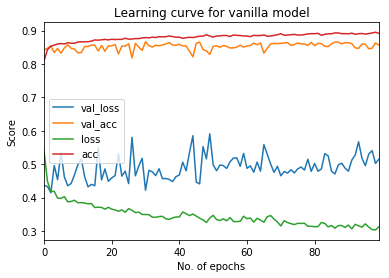

In [19]:
pandas.DataFrame(history.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Score")
plt.title("Learning curve for vanilla model")

The learning curve makes sense. The accuracy increases and the loss decreases with the epochs

Evaluation on test set

In [20]:
ypred = estimator.predict(X_test)
y_test = [numpy.argmax(y, axis=None, out=None) for y in y_test]
print("Accuracy score on test set")
print(accuracy_score(ypred,y_test))

Accuracy score on test set
0.8521


Model 2. Model with drop out- We use separate 10000 samples for model selection

In [0]:
def baseline_model2():
  model = Sequential()
  model.add(Dense(64, input_shape=input_shape, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, input_shape=input_shape, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
estimator = KerasClassifier(build_fn=baseline_model2)

In [23]:
history = estimator.fit(X_train, y_train, epochs=100, verbose=1,
          validation_split=10/60)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 277us/step - loss: 0.5709 - acc: 0.7966 - val_loss: 0.4219 - val_acc: 0.8473
Epoch 2/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.4600 - acc: 0.8343 - val_loss: 0.4041 - val_acc: 0.8519
Epoch 3/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.4404 - acc: 0.8391 - val_loss: 0.4178 - val_acc: 0.8481
Epoch 4/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.4307 - acc: 0.8447 - val_loss: 0.3837 - val_acc: 0.8622
Epoch 5/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.4220 - acc: 0.8461 - val_loss: 0.3935 - val_acc: 0.8562
Epoch 6/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.4239 - acc: 0.8455 - val_loss: 0.3955 - val_acc: 0.8571


Learning curve for model with Dropout

Text(0.5, 1.0, 'Learning curve for model with dropout')

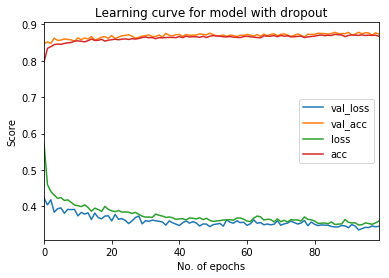

In [24]:
pandas.DataFrame(history.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Score")
plt.title("Learning curve for model with dropout")

The learning curve makes sense. The accuracy is increasing and the loss is decreasing with epochs. The learning curve is smoother as compared to vanilla model

Evaluation on test set

In [25]:
ypred = estimator.predict(X_test)
print("Accuracy score on test set")
print(accuracy_score(ypred,y_test))

Accuracy score on test set
0.8657


Performance of model with drop out is better than vanilla model

Model 3:  Model using batch normalization and residual  connections - We use separate 10000 samples for model selection

In [27]:
inputs = Input(shape=input_shape)
x1 = Dense(64, activation='tanh')(inputs)
x2 = BatchNormalization()(x1)
x3 = Flatten()(x2)
x4 = Dense(64, activation='tanh')(x3)
x5 = BatchNormalization()(x4)
x6 = Add()([x4,x5])
x7 = Dense(64, activation='tanh')(x6)
predictions = Dense(10, activation='softmax')(x7)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history  = model.fit(X_train, y_train, epochs=100, verbose=1,validation_split=10/60)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 361us/step - loss: 0.4831 - acc: 0.8270 - val_loss: 0.4116 - val_acc: 0.8438
Epoch 2/100
50000/50000 [==============================] - 12s 231us/step - loss: 0.3888 - acc: 0.8586 - val_loss: 0.4042 - val_acc: 0.8507
Epoch 3/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.3655 - acc: 0.8668 - val_loss: 0.3856 - val_acc: 0.8567
Epoch 4/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.3553 - acc: 0.8708 - val_loss: 0.3811 - val_acc: 0.8637
Epoch 5/100
50000/50000 [==============================] - 12s 231us/step - loss: 0.3544 - acc: 0.8706 - val_loss: 0.3727 - val_acc: 0.8631
Epoch 6/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.3391 - acc: 0.8742 - val_loss: 0.3644 - val_acc: 0.8648
Epoch 7/100
50000/50000 [==============================] - 13s 256us/step - loss: 0.3322 - acc: 0.8758 - val_l

Learning curve for model with Batch Normalization and Residual connections

Text(0.5, 1.0, 'Learning curve for model with batch normalization and residual connections')

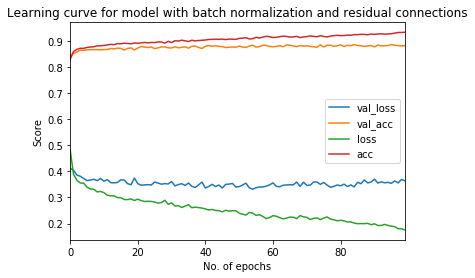

In [29]:
pandas.DataFrame(history.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Score")
plt.title("Learning curve for model with batch normalization and residual connections")

The learning curve makes sense. The accuracy is increasing and loss is decreasing with epochs

Evaluation on test set

In [34]:
ypred = model.predict(X_test)
ypred2 = [numpy.argmax(y, axis=None, out=None) for y in ypred]
print("Accuracy score on test set")
print(accuracy_score(ypred2,y_test))

Accuracy score on test set
0.8739


The performance of the model is better than both vanilla model and model with drop out